In [1]:
import yaml
import argparse
import numpy as np
import torch

#from models import *
from experiment import VAEXperiment
import torch.backends.cudnn as cudnn
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TestTubeLogger
from vanilla_vae import VanillaVAE

config_path = './vae.yaml'
with open(config_path, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)


tt_logger = TestTubeLogger(
    save_dir=config['logging_params']['save_dir'],
    name=config['logging_params']['name'],
    debug=False,
    create_git_tag=False,
)

# For reproducibility
torch.manual_seed(config['logging_params']['manual_seed'])
np.random.seed(config['logging_params']['manual_seed'])
cudnn.deterministic = True
cudnn.benchmark = False

model = VanillaVAE(**config['model_params'])
experiment = VAEXperiment(model,
                          config['exp_params'])

runner = Trainer(weights_save_path=f"{tt_logger.save_dir}",
                 min_epochs=1,
                 logger=tt_logger,
                 log_every_n_steps=100,
                 num_sanity_val_steps=5,
                 **config['trainer_params'])

print(f"======= Training {config['model_params']['name']} =======")
runner.fit(experiment)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


======= Training VanillaVAE =======



  | Name  | Type       | Params
-------------------------------------
0 | model | VanillaVAE | 3.9 M 
-------------------------------------
3.9 M     Trainable params
0         Non-trainable params
3.9 M     Total params
15.751    Total estimated model params size (MB)


Epoch 0:  89%|████████▉ | 1130/1268 [02:56<00:21,  6.39it/s, loss=0.0958, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 1:  89%|████████▉ | 1131/1268 [02:58<00:21,  6.34it/s, loss=0.0907, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 2:  89%|████████▉ | 1131/1268 [02:59<00:21,  6.31it/s, loss=0.086, v_num=9] 
Validating: 0it [00:00, ?it/s]
Epoch 3:  89%|████████▉ | 1131/1268 [03:03<00:22,  6.17it/s, loss=0.0836, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 4:  89%|████████▉ | 1131/1268 [03:01<00:21,  6.24it/s, loss=0.0825, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 5:  89%|████████▉ | 1131/1268 [02:57<00:21,  6.37it/s, loss=0.0808, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 6:  89%|████████▉ | 1131/1268 [02:58<00:21,  6.34it/s, loss=0.0788, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 7:  89%|████████▉ | 1131/1268 [02:58<00:21,  6.34it/s, loss=0.0792, v_num=9]
Validating: 0it [00:00, ?it/s]
Epoch 8:  89%|████████▉ | 1131/1268 [02:58<00:21,  6.33it/s, loss=0.0783, v_num=9]
Valid

1

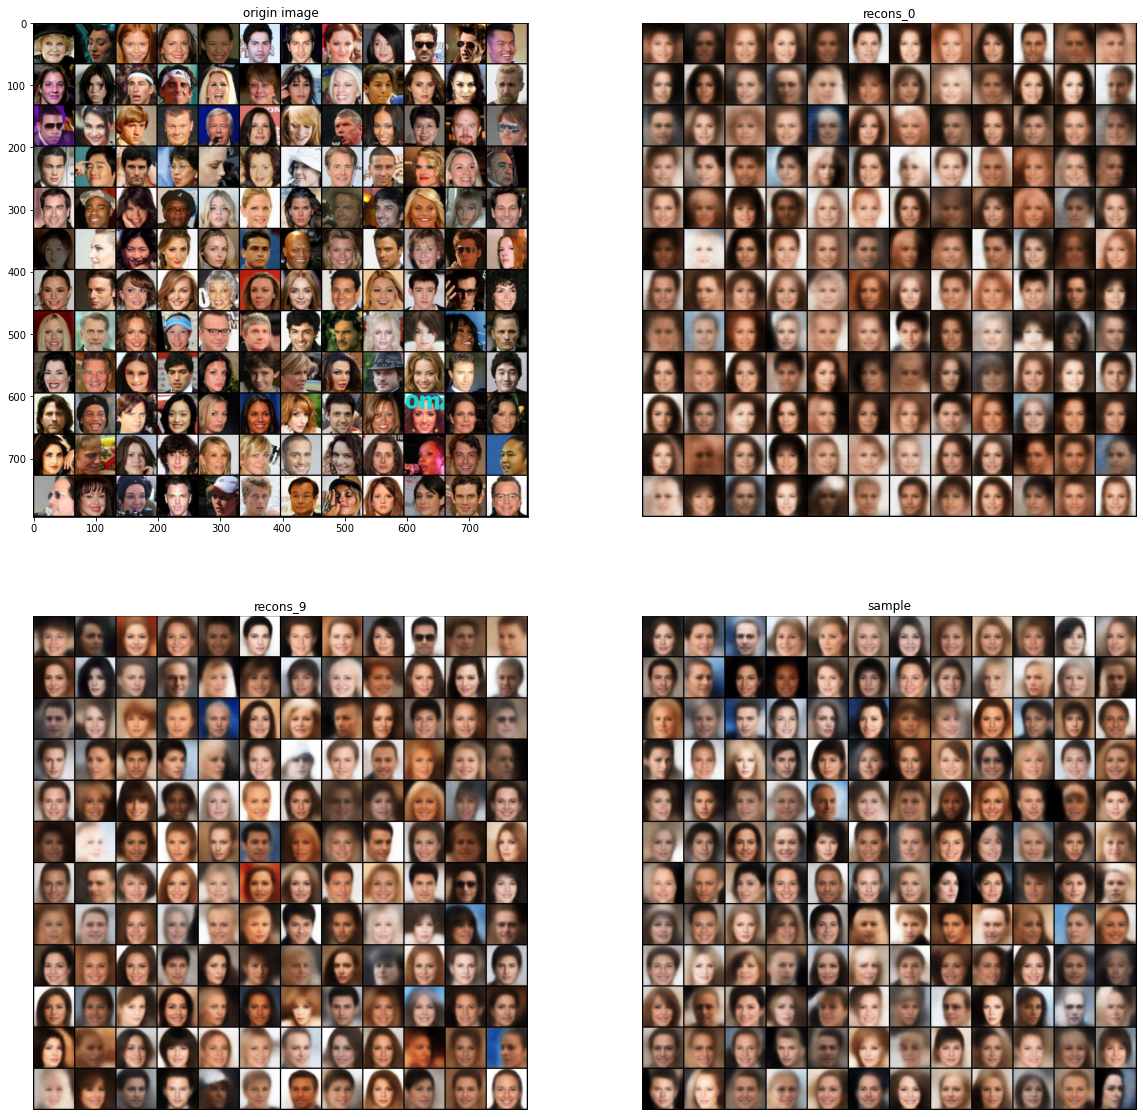

In [2]:
import matplotlib.image as IMG
import matplotlib.pyplot as plt
plt.figure(num='VanillaVAE',figsize=(20,20))
img1 = IMG.imread('./logs/VanillaVAE/version_0/real_img_VanillaVAE_0.png')
img2 = IMG.imread('./logs/VanillaVAE/version_0/recons_VanillaVAE_0.png')
img3 = IMG.imread('./logs/VanillaVAE/version_0/recons_VanillaVAE_9.png')
img4 = IMG.imread('./logs/VanillaVAE/version_0/VanillaVAE_9.png')
plt.subplot(2,2,1)   
plt.title('origin image')   
plt.imshow(img1)    

plt.subplot(2,2,2)  
plt.title('recons_0')  
plt.imshow(img2)    
plt.axis('off')   

plt.subplot(2,2,3) 
plt.title('recons_9')  
plt.imshow(img3)    
plt.axis('off')   

plt.subplot(2,2,4)    
plt.title('sample')   
plt.imshow(img4)      
plt.axis('off')   

plt.show()   